# Lista 6

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy import signal


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['text.usetex'] = True

### Nesse caso estou considerando que eu acertei exatamente o número de coeficientes do filtro


### Considerando diversos valores de $\lambda$

In [144]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25]])

# Número de iterações
n_iteracoes = 800
# Número de Monte Carlo
n_mc = 50
Lambdas = [0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.8, 0.7, 0.6, 0.4, 0.3]

coef_numa_rodada = []
mse = []
delta = 0.01
for Lambda in Lambdas:
    for mc in range(n_mc):

        # Inicializações
        erros = np.array([])
        w_atual = np.array([[0], [0]])
        x = np.array([[0], [0]])
        # Ruído com média zero
        ruido = np.random.random(n_iteracoes)
        ruido = ruido - ruido.mean()
        
        S_D = delta * np.eye(2)
        for ii in range(n_iteracoes):
            desejado = np.dot(x.T, h) + 0.3*ruido[ii]
            saida = np.dot(x.T, w_atual) 
            erros = np.append(erros, [desejado - saida])
            
            
            psi = S_D.dot(x.conj())
            S_D = (1./Lambda) * (S_D - np.outer(psi, psi.conj())/(Lambda + psi.T.conj().dot(x)))
            # O LMS
            w_prox = w_atual + erros[ii]*S_D.dot(x)

            # Atualiza o valor dos coeficientes do filtro
            w_atual = w_prox
            coef_numa_rodada += [w_prox]
            
            #Atualiza o x (shifta o que tem e coloca um valor novo no final)
            x = np.roll(x, shift=-1)
            x = np.append(arr=x[:-1], values=ruido[ii])
            x = np.reshape(x, (len(x), 1))  
        if mc == 0:
            erros_mc = erros
        else:
            erros_mc = np.vstack((erros_mc, erros))
    
    coeficientes += [w_prox]
    mse += [np.mean(erros_mc*erros_mc, axis=0)] 

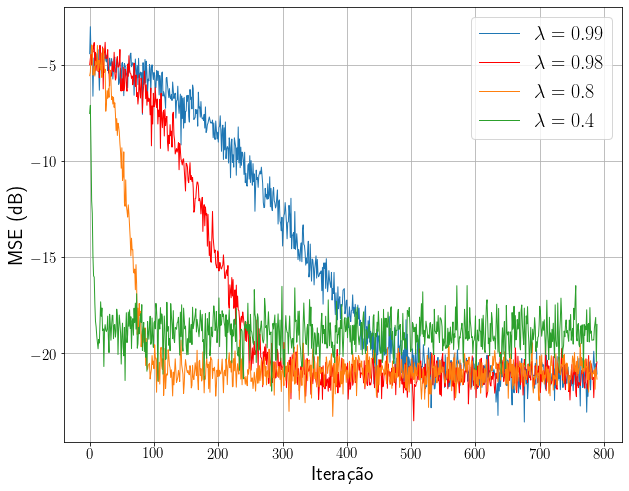

In [148]:
eps = 10**-16
x_plt = []
for cada in mse: 
    cada = cada[10:]
    x_plt += [10 * np.log10(cada + eps)]

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['text.usetex'] = True


fig, ax1 = plt.subplots()

ax1.plot(range(len(mse[0][10:])), x_plt[0], label=r'$\lambda = 0.99$')
ax1.plot(range(len(mse[1][10:])), x_plt[1], 'r', label=r'$\lambda = 0.98$')
# ax1.plot(range(len(mse[2][10:])), x_plt[2], 'g', label=r'$\lambda = 0.97$')
# ax1.plot(range(len(mse[2][10:])), x_plt[3], 'b', label=r'$\lambda = 0.96$')
# ax1.plot(range(len(mse[2][10:])), x_plt[4], label=r'$\lambda = 0.95$')
# ax1.plot(range(len(mse[2][10:])), x_plt[4], label=r'$\lambda = 0.94$')
# ax1.plot(range(len(mse[2][10:])), x_plt[5], label=r'$\lambda = 0.93$')
ax1.plot(range(len(mse[2][10:])), x_plt[6], label=r'$\lambda = 0.8$')
# ax1.plot(range(len(mse[2][10:])), x_plt[7], label=r'$\lambda = 0.7$')
# ax1.plot(range(len(mse[2][10:])), x_plt[8], label=r'$\lambda = 0.6$')
ax1.plot(range(len(mse[2][10:])), x_plt[9], label=r'$\lambda = 0.4$')
# ax1.plot(range(len(mse[2][10:])), x_plt[10], label=r'$\lambda = 0.3$')


ax1.legend(loc='upper right')
ax1.set_ylabel(r'MSE~(dB)')
ax1.set_xlabel(r'Iteração')
ax1.grid(True)


plt.savefig('mse_rls.pdf', dpi=300, transparent=True, optimize=True, bbox_inches='tight')
plt.show()

### Considerando menos valores de $\lambda$ para olhar de perto o MSE

In [125]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25]])

# Número de iterações
n_iteracoes = 800
# Número de Monte Carlo
n_mc = 100
Lambdas = [0.98]

mse = []
delta = 0.01
for Lambda in Lambdas:
    coef_num_mc = np.array([])
    for mc in range(n_mc):

        # Inicializações
        erros = np.array([])
        coef_numa_rodada = np.array([])
        w_atual = np.array([[0], [0]])
        x = np.array([[0], [0]])
        # Ruído com média zero
        ruido = np.random.random(n_iteracoes)
        ruido = ruido - ruido.mean()
        
        S_D = delta * np.eye(2)
        for ii in range(n_iteracoes):
            desejado = np.dot(x.T, h) + 0.1*ruido[ii]
            saida = np.dot(x.T, w_atual) 
            erros = np.append(erros, [desejado - saida])
            
            
            psi = S_D.dot(x.conj())
            S_D = (1./Lambda) * (S_D - np.outer(psi, psi.conj())/(Lambda + psi.T.conj().dot(x)))
            # O LMS
            w_prox = w_atual + erros[ii]*S_D.dot(x)

            # Atualiza o valor dos coeficientes do filtro
            w_atual = w_prox
            if ii == 0:
                coef_numa_rodada = w_atual
            else:
                coef_numa_rodada = np.hstack((coef_numa_rodada, w_atual))
            
            #Atualiza o x (shifta o que tem e coloca um valor novo no final)
            x = np.roll(x, shift=-1)
            x = np.append(arr=x[:-1], values=ruido[ii])
            x = np.reshape(x, (len(x), 1))  
        if mc == 0:
            coef_num_mc = coef_numa_rodada
            erros_mc = erros
        else:
            coef_num_mc = np.dstack((coef_num_mc, coef_numa_rodada))
            erros_mc = np.vstack((erros_mc, erros))
        
    mse += [np.mean(erros_mc*erros_mc, axis=0)] 

Média dos coeficientes no Monte Carlo

In [126]:
media_lambda_99 = np.mean(coef_num_mc, axis=2)

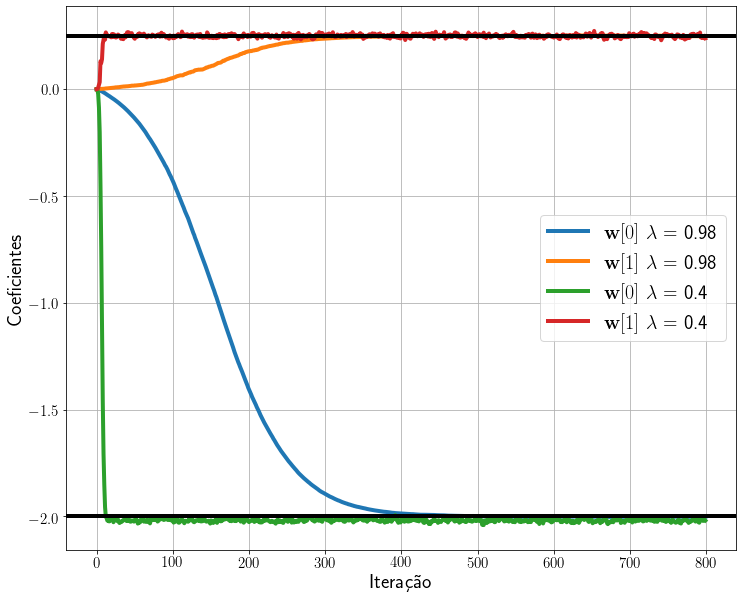

In [143]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['lines.linewidth'] = 4


plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams['text.usetex'] = True


fig, ax1 = plt.subplots()

ax1.plot(range(n_iteracoes), media_lambda_99[0,:], label=r'$\mathbf{w}[0]$ $\lambda$ = 0.98')
ax1.plot(range(n_iteracoes), media_lambda_99[1,:], label='$\mathbf{w}[1]$ $\lambda$ = 0.98')

ax1.plot(range(n_iteracoes), media_lambda_30[0,:], label='$\mathbf{w}[0]$ $\lambda$ = 0.4')
ax1.plot(range(n_iteracoes), media_lambda_30[1,:], label='$\mathbf{w}[1]$ $\lambda$ = 0.4')

ax1.axhline(y=h[0], xmin=0, xmax=1, color='k')
ax1.axhline(y=h[1], xmin=0, xmax=1, color='k')
plt.legend()

ax1.set_ylabel(r'Coeficientes')
ax1.set_xlabel(r'Iteração')
ax1.grid(True)


plt.savefig('coeficientes.pdf', dpi=300, transparent=True, optimize=True, bbox_inches='tight')
plt.show()

Aqui eu quero mostrar convergencia dos coeficientes para lambdas diferentes

In [127]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25]])

# Número de iterações
n_iteracoes = 800
# Número de Monte Carlo
n_mc = 100
Lambdas = [0.4]

mse = []
delta = 0.01
for Lambda in Lambdas:
    coef_num_mc = np.array([])
    for mc in range(n_mc):

        # Inicializações
        erros = np.array([])
        coef_numa_rodada = np.array([])
        w_atual = np.array([[0], [0]])
        x = np.array([[0], [0]])
        # Ruído com média zero
        ruido = np.random.random(n_iteracoes)
        ruido = ruido - ruido.mean()
        
        S_D = delta * np.eye(2)
        for ii in range(n_iteracoes):
            desejado = np.dot(x.T, h) + 0.1*ruido[ii]
            saida = np.dot(x.T, w_atual) 
            erros = np.append(erros, [desejado - saida])
            
            
            psi = S_D.dot(x.conj())
            S_D = (1./Lambda) * (S_D - np.outer(psi, psi.conj())/(Lambda + psi.T.conj().dot(x)))
            # O LMS
            w_prox = w_atual + erros[ii]*S_D.dot(x)

            # Atualiza o valor dos coeficientes do filtro
            w_atual = w_prox
            if ii == 0:
                coef_numa_rodada = w_atual
            else:
                coef_numa_rodada = np.hstack((coef_numa_rodada, w_atual))
            
            #Atualiza o x (shifta o que tem e coloca um valor novo no final)
            x = np.roll(x, shift=-1)
            x = np.append(arr=x[:-1], values=ruido[ii])
            x = np.reshape(x, (len(x), 1))  
        if mc == 0:
            coef_num_mc = coef_numa_rodada
            erros_mc = erros
        else:
            coef_num_mc = np.dstack((coef_num_mc, coef_numa_rodada))
            erros_mc = np.vstack((erros_mc, erros))
    
    mse += [np.mean(erros_mc*erros_mc, axis=0)] 

In [128]:
media_lambda_30 = np.mean(coef_num_mc, axis=2)

### Diferentes valores de ruído

In [150]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25]])

# Número de iterações
n_iteracoes = 800
# Número de Monte Carlo
n_mc = 50
# Lambdas = [0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.8, 0.7, 0.6, 0.4, 0.3]
Lambda = 0.98
sigmas_ruido = [0.1, 0.2, 0.3, 0.5, 1, 1.1, 2, 5]
coef_numa_rodada = []
mse = []
delta = 0.01
for sigma_ruido in sigmas_ruido:
    for mc in range(n_mc):

        # Inicializações
        erros = np.array([])
        w_atual = np.array([[0], [0]])
        x = np.array([[0], [0]])
        # Ruído com média zero
        ruido = np.random.random(n_iteracoes)
        ruido = ruido - ruido.mean()
        
        S_D = delta * np.eye(2)
        for ii in range(n_iteracoes):
            desejado = np.dot(x.T, h) + sigma_ruido*ruido[ii]
            saida = np.dot(x.T, w_atual) 
            erros = np.append(erros, [desejado - saida])
            
            
            psi = S_D.dot(x.conj())
            S_D = (1./Lambda) * (S_D - np.outer(psi, psi.conj())/(Lambda + psi.T.conj().dot(x)))
            # O LMS
            w_prox = w_atual + erros[ii]*S_D.dot(x)

            # Atualiza o valor dos coeficientes do filtro
            w_atual = w_prox
            coef_numa_rodada += [w_prox]
            
            #Atualiza o x (shifta o que tem e coloca um valor novo no final)
            x = np.roll(x, shift=-1)
            x = np.append(arr=x[:-1], values=ruido[ii])
            x = np.reshape(x, (len(x), 1))  
        if mc == 0:
            erros_mc = erros
        else:
            erros_mc = np.vstack((erros_mc, erros))
    
    coeficientes += [w_prox]
    mse += [np.mean(erros_mc*erros_mc, axis=0)] 

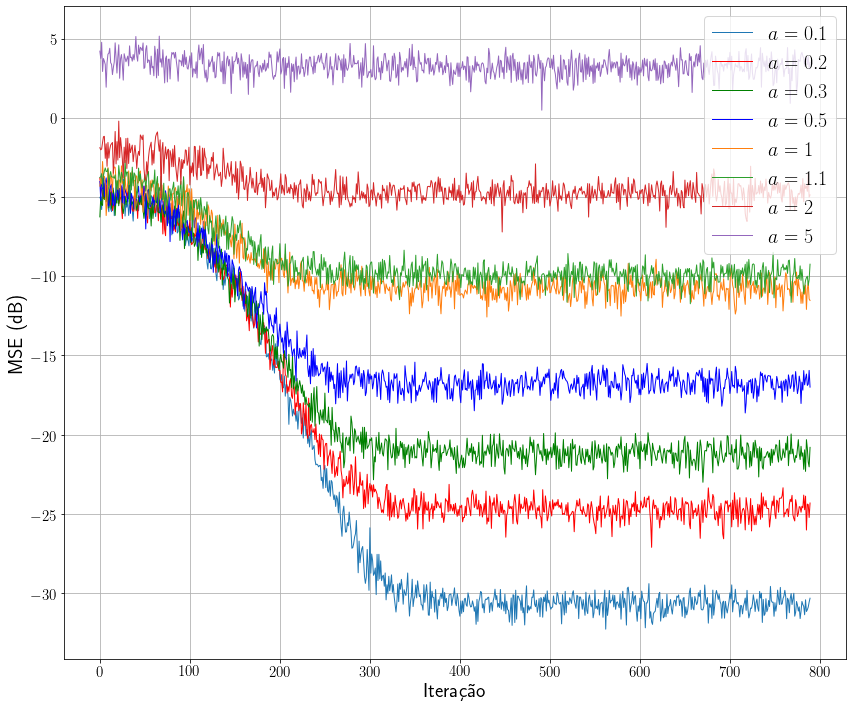

In [158]:
eps = 10**-16
x_plt = []
for cada in mse: 
    cada = cada[10:]
    x_plt += [10 * np.log10(cada + eps)]

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 14, 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['text.usetex'] = True


fig, ax1 = plt.subplots()

ax1.plot(range(len(mse[0][10:])), x_plt[0], label=r'$a = 0.1$')
ax1.plot(range(len(mse[1][10:])), x_plt[1], 'r', label=r'$a = 0.2$')
ax1.plot(range(len(mse[2][10:])), x_plt[2], 'g', label=r'$a = 0.3$')
ax1.plot(range(len(mse[2][10:])), x_plt[3], 'b', label=r'$a = 0.5$')
ax1.plot(range(len(mse[2][10:])), x_plt[4], label=r'$a = 1$')
ax1.plot(range(len(mse[2][10:])), x_plt[5], label=r'$a = 1.1$')
ax1.plot(range(len(mse[2][10:])), x_plt[6], label=r'$a = 2$')
ax1.plot(range(len(mse[2][10:])), x_plt[7], label=r'$a = 5$')


ax1.legend(loc='upper right')
ax1.set_ylabel(r'MSE~(dB)')
ax1.set_xlabel(r'Iteração')
ax1.grid(True)


plt.savefig('ruidos.pdf', dpi=300, transparent=True, optimize=True, bbox_inches='tight')
plt.show()